### Business Problem
Our basic aim is to predict customer churn for a certain bank i.e. which customer is going to leave this bank service. Dataset is small(for learning purpose) and contains 10000 rows with 14 columns. I am not explaining data in detail as dataset is self explanatory.

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [8]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [10]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [11]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [15]:
#Initializing Neural Network
classifier = Sequential()

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [17]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
8000/8000 [==============================] - 2s 272us/step - loss: 0.4912 - acc: 0.7962
Epoch 2/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.4270 - acc: 0.7967
Epoch 3/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4220 - acc: 0.7967
Epoch 4/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4177 - acc: 0.8146
Epoch 5/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4148 - acc: 0.8270
Epoch 6/100
8000/8000 [==============================] - 1s 118us/step - loss: 0.4130 - acc: 0.8296
Epoch 7/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.4118 - acc: 0.8331
Epoch 8/100
8000/8000 [==============================] - 1s 118us/step - loss: 0.4102 - acc: 0.8339
Epoch 9/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.4086 - acc: 0.8344
Epoch 10/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.4079 - acc: 0.8340

8000/8000 [==============================] - 2s 258us/step - loss: 0.3980 - acc: 0.8375 2s -
Epoch 82/100
8000/8000 [==============================] - 1s 157us/step - loss: 0.3981 - acc: 0.8359
Epoch 83/100
8000/8000 [==============================] - 1s 149us/step - loss: 0.3986 - acc: 0.8364
Epoch 84/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.3981 - acc: 0.8356 1s - loss
Epoch 85/100
8000/8000 [==============================] - 1s 156us/step - loss: 0.3981 - acc: 0.8386
Epoch 86/100
8000/8000 [==============================] - 1s 160us/step - loss: 0.3985 - acc: 0.8371
Epoch 87/100
8000/8000 [==============================] - 1s 170us/step - loss: 0.3977 - acc: 0.8379
Epoch 88/100
8000/8000 [==============================] - 1s 168us/step - loss: 0.3980 - acc: 0.8352
Epoch 89/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.3983 - acc: 0.8375
Epoch 90/100
8000/8000 [==============================] - 1s 162us/step - loss: 0.3981 - 

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [20]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

### Second Example using TF

In [21]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [22]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
train_images.shape

(60000, 28, 28)

In [25]:
len(train_labels)

60000

In [26]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
test_images.shape

(10000, 28, 28)

In [28]:
len(test_labels)

10000

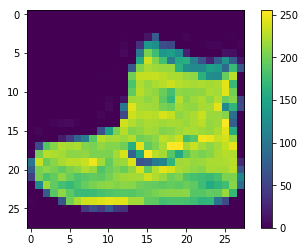

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
train_images = train_images / 255.0

test_images = test_images / 255.0

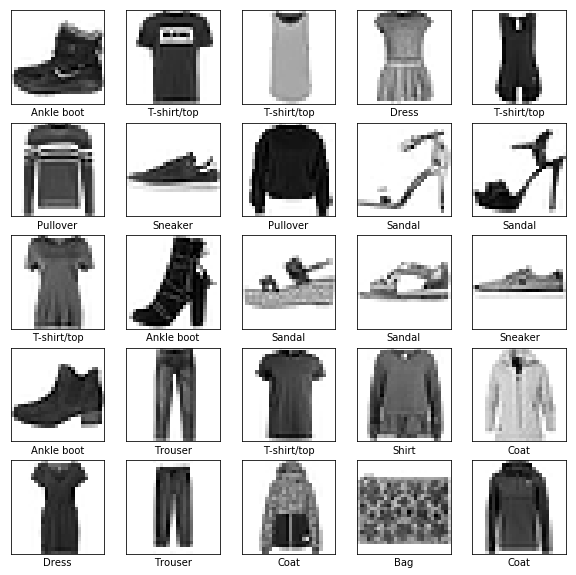

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [33]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.5006 - acc: 0.8241
Epoch 2/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.3776 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.3356 - acc: 0.8775
Epoch 4/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3139 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.2930 - acc: 0.8914


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 38us/step
Test accuracy: 0.8676


In [36]:
predictions = model.predict(test_images)

In [37]:
predictions[0]

array([5.8968499e-07, 3.8780644e-08, 4.4482391e-09, 3.2098831e-07,
       6.4304118e-09, 1.0293823e-03, 1.1822410e-06, 1.6145695e-02,
       1.3791507e-05, 9.8280901e-01], dtype=float32)

In [38]:
np.argmax(predictions[0])

9

In [39]:
test_labels[0]

9

In [40]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

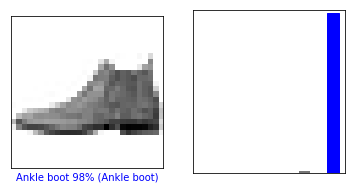

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

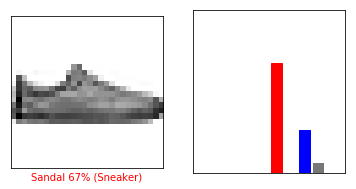

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

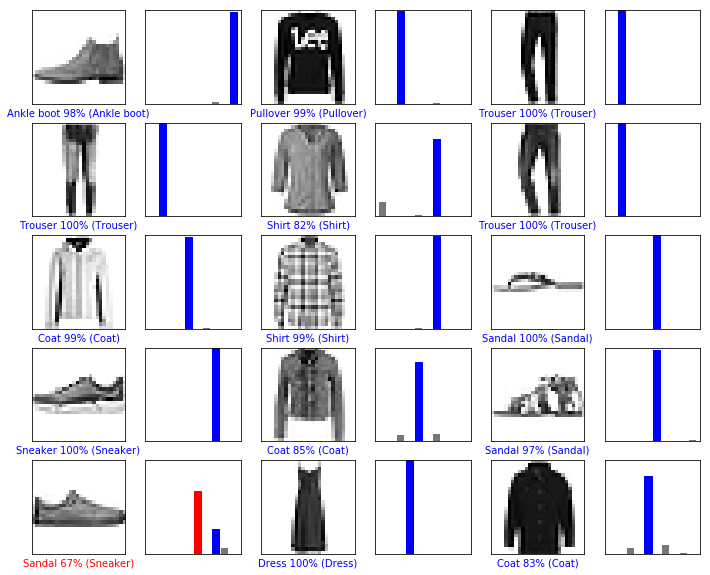

In [43]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [44]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [45]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [46]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.8968442e-07 3.8780716e-08 4.4482475e-09 3.2098831e-07 6.4304242e-09
  1.0293813e-03 1.1822410e-06 1.6145712e-02 1.3791520e-05 9.8280901e-01]]


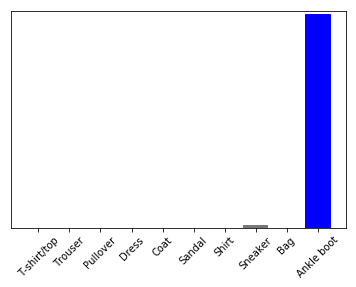

In [47]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [48]:
np.argmax(predictions_single[0])

9